In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#from scipy.integrate import solve_ivp (If you wanted to use solve_ivp instead)
%matplotlib inline

In [15]:
#Parameters that definitely won't change
V0 = [5] #dm^3
t_range = np.linspace(0, 500, 500)

#kinetics
k = 2.2 #L/mol-s

#Feed
CB_feed = 0.025 #M
v0 = 0.05 #L/s

#Initial concentrations (A-D)
Ci0 = [0.05, 0, 0, 0]

In [23]:
def dCdt(current, t):
    V, CA, CB, CC, CD = current
    rA = -k*CA*CB
    dCAdt = rA-v0/V*CA
    dCBdt = rA+v0*(CB_feed-CB)/V
    dCCdt = -rA-v0/V*CC
    dCDdt = -rA-v0/V*CD
    dVdt = v0
    return dVdt, dCAdt, dCBdt, dCCdt, dCDdt

Text(0, 0.5, 'rA (mol/L-s)')

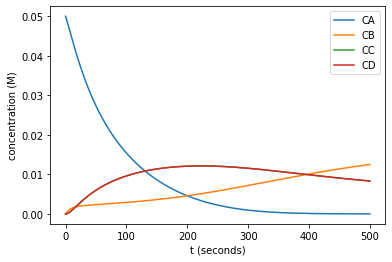

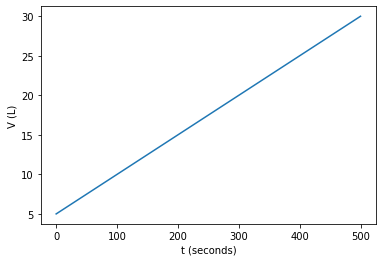

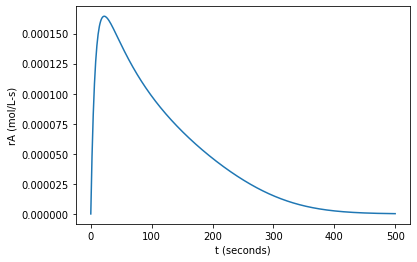

In [33]:
#V0 + Ci0
sol = odeint(dCdt, V0 + Ci0, t_range)
#print(sol)
np_sol = np.asarray(sol)
labels = ['V', 'CA', 'CB', 'CC', 'CD']

plt.figure()
for col in range(1,np_sol.shape[1]): 
    plt.plot(t_range, np_sol[:,col], label=labels[col])
plt.legend()
plt.xlabel('t (seconds)')
plt.ylabel('concentration (M)')

plt.figure()
plt.plot(t_range, np_sol[:,0])
plt.xlabel('t (seconds)')
plt.ylabel('V (L)')

plt.figure()
rate = k*np_sol[:,1]*np_sol[:,2]
plt.plot(t_range, rate)
plt.xlabel('t (seconds)')
plt.ylabel('rA (mol/L-s)')
    